In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import sys
sys.path.append('../') 
import importlib
import utils.eda_utils as eda_utils

In [3]:
#pd.set_option('display.max_columns', None)

df_prf = pd.read_csv("../data/datatran2024.csv",
                            delimiter=';',
                            encoding='ISO-8859-1', #'utf-8' 'latin1',
                            low_memory=False
                            )
df_prf.shape

(60365, 30)

In [4]:
df_prf.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789,01/01/2024,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804,01/01/2024,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806,01/01/2024,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818,01/01/2024,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838,01/01/2024,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT


In [5]:
df_prf.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
60360,642043,17/09/2024,terça-feira,03:00:00,PR,116,39,CAMPINA GRANDE DO SUL,Velocidade Incompatível,Saída de leito carroçável,...,0,2,0,1,1,"-25,156168","-48,8613401",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
60361,642079,27/10/2024,domingo,02:30:00,SP,116,"111,5",TAUBATE,Ingestão de álcool pelo condutor,Capotamento,...,0,1,1,0,2,"-23,03887149","-45,56097419",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
60362,642188,07/06/2024,sexta-feira,11:40:00,PA,230,995,RUROPOLIS,Acumulo de areia ou detritos sobre o pavimento,Colisão com objeto,...,0,2,0,0,1,"-4,08910809","-54,859784",SPRF-PA,DEL05-PA,UOP01-DEL05-PA
60363,642258,03/08/2024,sábado,13:58:00,PI,343,"645,6",JERUMENHA,Demais falhas mecânicas ou elétricas,Colisão traseira,...,1,0,0,2,2,"-7,040227","-43,41214",SPRF-PI,DEL03-PI,UOP01-DEL03-PI
60364,642317,18/10/2024,sexta-feira,09:00:00,SP,153,"68,7",SAO JOSE DO RIO PRETO,Avarias e/ou desgaste excessivo no pneu,Saída de leito carroçável,...,0,1,0,0,1,"-20,8505829","-49,383795",SPRF-SP,DEL09-SP,UOP01-DEL09-SP


In [6]:
# verificando o tipo dos dados
df_prf.dtypes

id                        object
data_inversa              object
dia_semana                object
horario                   object
uf                        object
br                         int64
km                        object
municipio                 object
causa_acidente            object
tipo_acidente             object
classificacao_acidente    object
fase_dia                  object
sentido_via               object
condicao_metereologica    object
tipo_pista                object
tracado_via               object
uso_solo                  object
pessoas                    int64
mortos                     int64
feridos_leves              int64
feridos_graves             int64
ilesos                     int64
ignorados                  int64
feridos                    int64
veiculos                   int64
latitude                  object
longitude                 object
regional                  object
delegacia                 object
uop                       object
dtype: obj

In [7]:
importlib.reload(eda_utils)

# Testando a função com o dataframe dados_prf_2024
metadata_df = eda_utils.generate_metadata(df_prf)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,veiculos,int64,0,0.00,19
1,br,int64,0,0.00,113
2,feridos,int64,0,0.00,36
3,ignorados,int64,0,0.00,17
4,ilesos,int64,0,0.00,47
5,feridos_graves,int64,0,0.00,17
6,feridos_leves,int64,0,0.00,34
7,mortos,int64,0,0.00,10
8,pessoas,int64,0,0.00,55
9,id,object,0,0.00,60365


In [8]:
df_prf.describe()

,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000
mean,209.151661,2.588503,0.083095,0.872791,0.277578,1.043237,0.401822,1.150369,1.995113
std,128.749927,2.149298,0.344480,1.087015,0.628505,1.690429,0.830804,1.203955,1.092164
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,319.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,495.000000,61.000000,23.000000,43.000000,30.000000,60.000000,33.000000,45.000000,26.000000


In [9]:
df_prf.describe(include='all')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
count,60365,60365,60365,60365,60365,60365.000000,60365,60365,60365,60365,...,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365,60365,60364,60341,60270
unique,60365,305,7,1400,27,NaN,7341,1809,69,17,...,NaN,NaN,NaN,NaN,NaN,32558,32535,28,152,394
top,642317,20/10/2024,domingo,19:00:00,MG,NaN,1,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,...,NaN,NaN,NaN,NaN,NaN,"-27,59193546","-48,61824557",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,1,281,9687,939,7597,NaN,297,895,9000,11638,...,NaN,NaN,NaN,NaN,NaN,63,63,7571,2198,998
mean,NaN,NaN,NaN,NaN,NaN,209.151661,NaN,NaN,NaN,NaN,...,0.277578,1.043237,0.401822,1.150369,1.995113,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,128.749927,NaN,NaN,NaN,NaN,...,0.628505,1.690429,0.830804,1.203955,1.092164,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,158.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,319.000000,NaN,NaN,NaN,NaN,...,0.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


- Quantidade de Observações: Existem 32.440 registros no conjunto de dados. Isso indica uma quantidade considerável de incidentes registrados.

- Valores Nulos: Algumas colunas, como br e km, têm menos observações do que o total de registros, indicando a presença de valores nulos.

- Incidentes por Dia: O dia com mais incidentes é o "domingo" (5.375 registros), o que pode indicar que os finais de semana têm uma frequência mais alta de incidentes ou que as pessoas viajam mais nesse dia.

- Localização dos Incidentes: A maioria dos incidentes ocorre em Minas Gerais (MG), com 4.234 registros.

- Causa mais Comum: A causa mais frequente de incidentes é a "Reação tardia ou ineficiente do condutor", ocorrendo 4.672 vezes.

- Tipo de Acidente mais Comum: A "Colisão traseira" é o tipo mais comum de acidente, ocorrendo 6.179 vezes.

- Quantidade de Veículos Envolvidos: Em média, cada incidente envolve aproximadamente 1,66 veículos.

- Vítimas: A média de feridos por incidente é de 1,15, com um máximo de 62 feridos em um único incidente. Além disso, a média de feridos graves por incidente é de 0,28.

- Distribuição de Incidentes ao Longo do Ano: O dia com o maior número de incidentes registrados é "2023-06-11", com 248 incidentes.

- Diversidade de Causas e Tipos: Há 71 causas diferentes de acidentes e 16 tipos diferentes de acidentes listados no conjunto de dados.



In [10]:
df_prf.shape

(60365, 30)

In [11]:
metadata_df.to_csv("../data/metadata.csv", sep=';', index=False, encoding='ISO-8859-1')

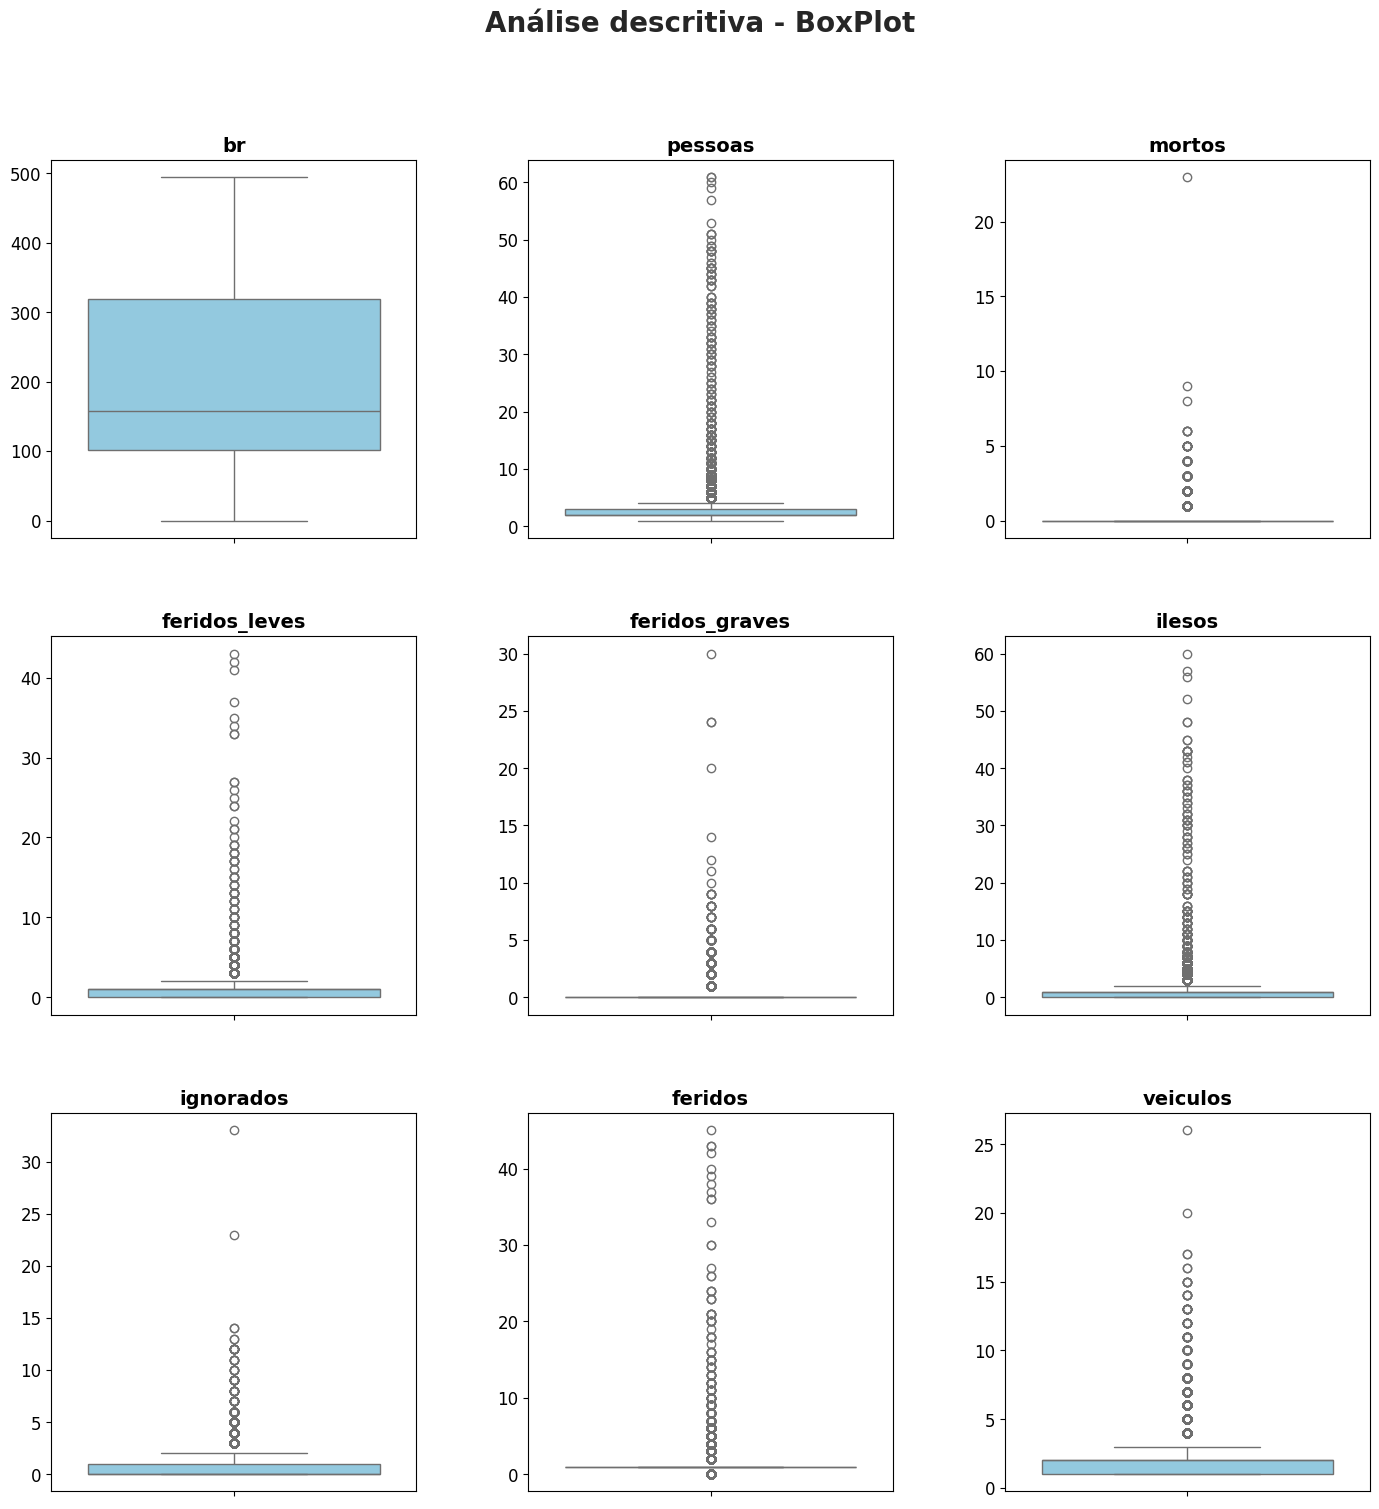

In [12]:
importlib.reload(eda_utils)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
eda_utils.box_plot(df_prf)

**Variabilidade e Distribuição:**

- Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero, indicando que muitos incidentes envolvem poucas pessoas ou nenhuma vítima. No entanto, existem alguns valores atipicamente altos para estas variáveis, sugerindo que, embora raros, existem incidentes com um número significativo de envolvidos ou vítimas.

**Outliers**:

- Muitas das variáveis apresentam outliers. Estes são pontos que caem fora das "antenas" do boxplot e podem indicar valores atipicamente altos ou baixos. Por exemplo, a variável pessoas tem vários valores que são consideravelmente mais altos do que a mediana, sugerindo incidentes com um número anormalmente alto de pessoas envolvidas.
Os outliers podem indicar tanto erros de entrada de dados quanto eventos reais que são atípicos. Eles podem ser investigados mais a fundo para entender sua natureza.

**Concentração de Dados:**

- A linha central do box (mediana) para variáveis como mortos, feridos_leves, feridos_graves, e ilesos está no valor zero. Isso indica que a maioria dos incidentes não resulta em mortes ou ferimentos.

**Amplitude dos Dados:**

- O intervalo interquartil (IQR), que é a altura da caixa no boxplot, indica onde reside a metade central dos dados. Para muitas das variáveis, o IQR é pequeno, mostrando que os valores estão concentrados. Por outro lado, uma caixa maior indica maior variabilidade nos dados.

**Tendências e Anomalias:**

- Se os dados estivessem distribuídos em grupos ou categorias (como diferentes estados ou tipos de incidentes), poderíamos usar boxplots para comparar essas categorias e identificar tendências ou anomalias específicas de cada grupo.
Estes são insights gerais que podem ser obtidos a partir dos boxplots. Para insights mais específicos ou detalhados, seria útil combinar a análise visual dos boxplots com outras técnicas estatísticas e métodos de visualização.


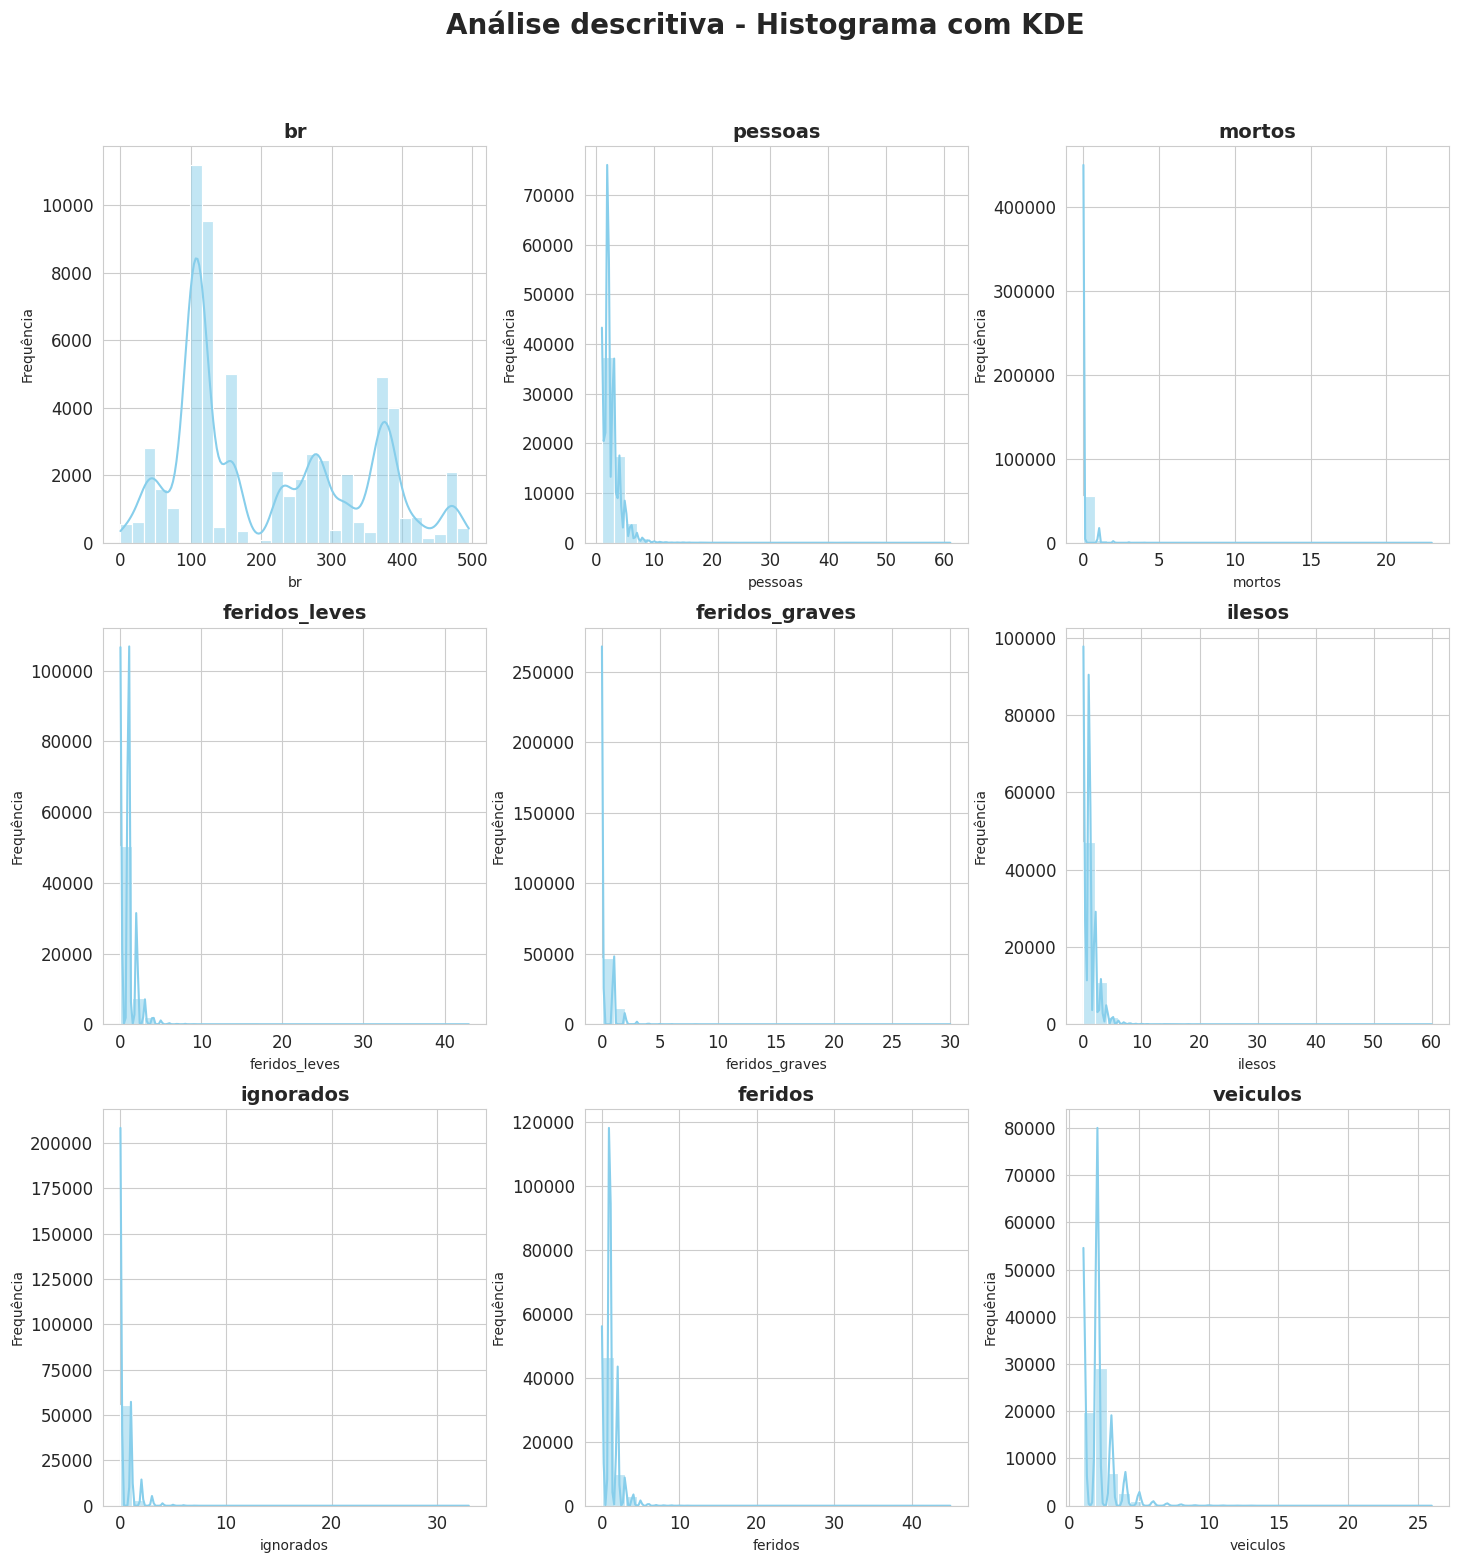

In [13]:
importlib.reload(eda_utils)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
eda_utils.histograms(df_prf)

**Distribuição**:
- Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero. Isso é consistente com os boxplots.

**Modas:**
- A maioria das variáveis tem uma única moda, indicando uma distribuição unimodal. No entanto, se houvesse mais de um pico, isso indicaria uma distribuição bimodal ou multimodal.

**Assimetria:**
- Muitas das variáveis mostram uma assimetria positiva, com uma "cauda" à direita. Isso indica que a maioria dos incidentes envolve poucas pessoas ou tem poucas vítimas, mas há casos raros (outliers) com um número elevado de pessoas envolvidas ou vítimas.

**Outliers e Valores Atípicos:**
- Como os histogramas mostram a frequência de valores, é difícil identificar outliers diretamente. No entanto, a presença de uma "cauda" longa em um histograma pode indicar a presença de outliers.

**Concentração de Dados:**
- A altura das barras do histograma indica a frequência de valores. Assim, podemos ver que a maioria dos incidentes não resulta em mortes ou ferimentos graves.

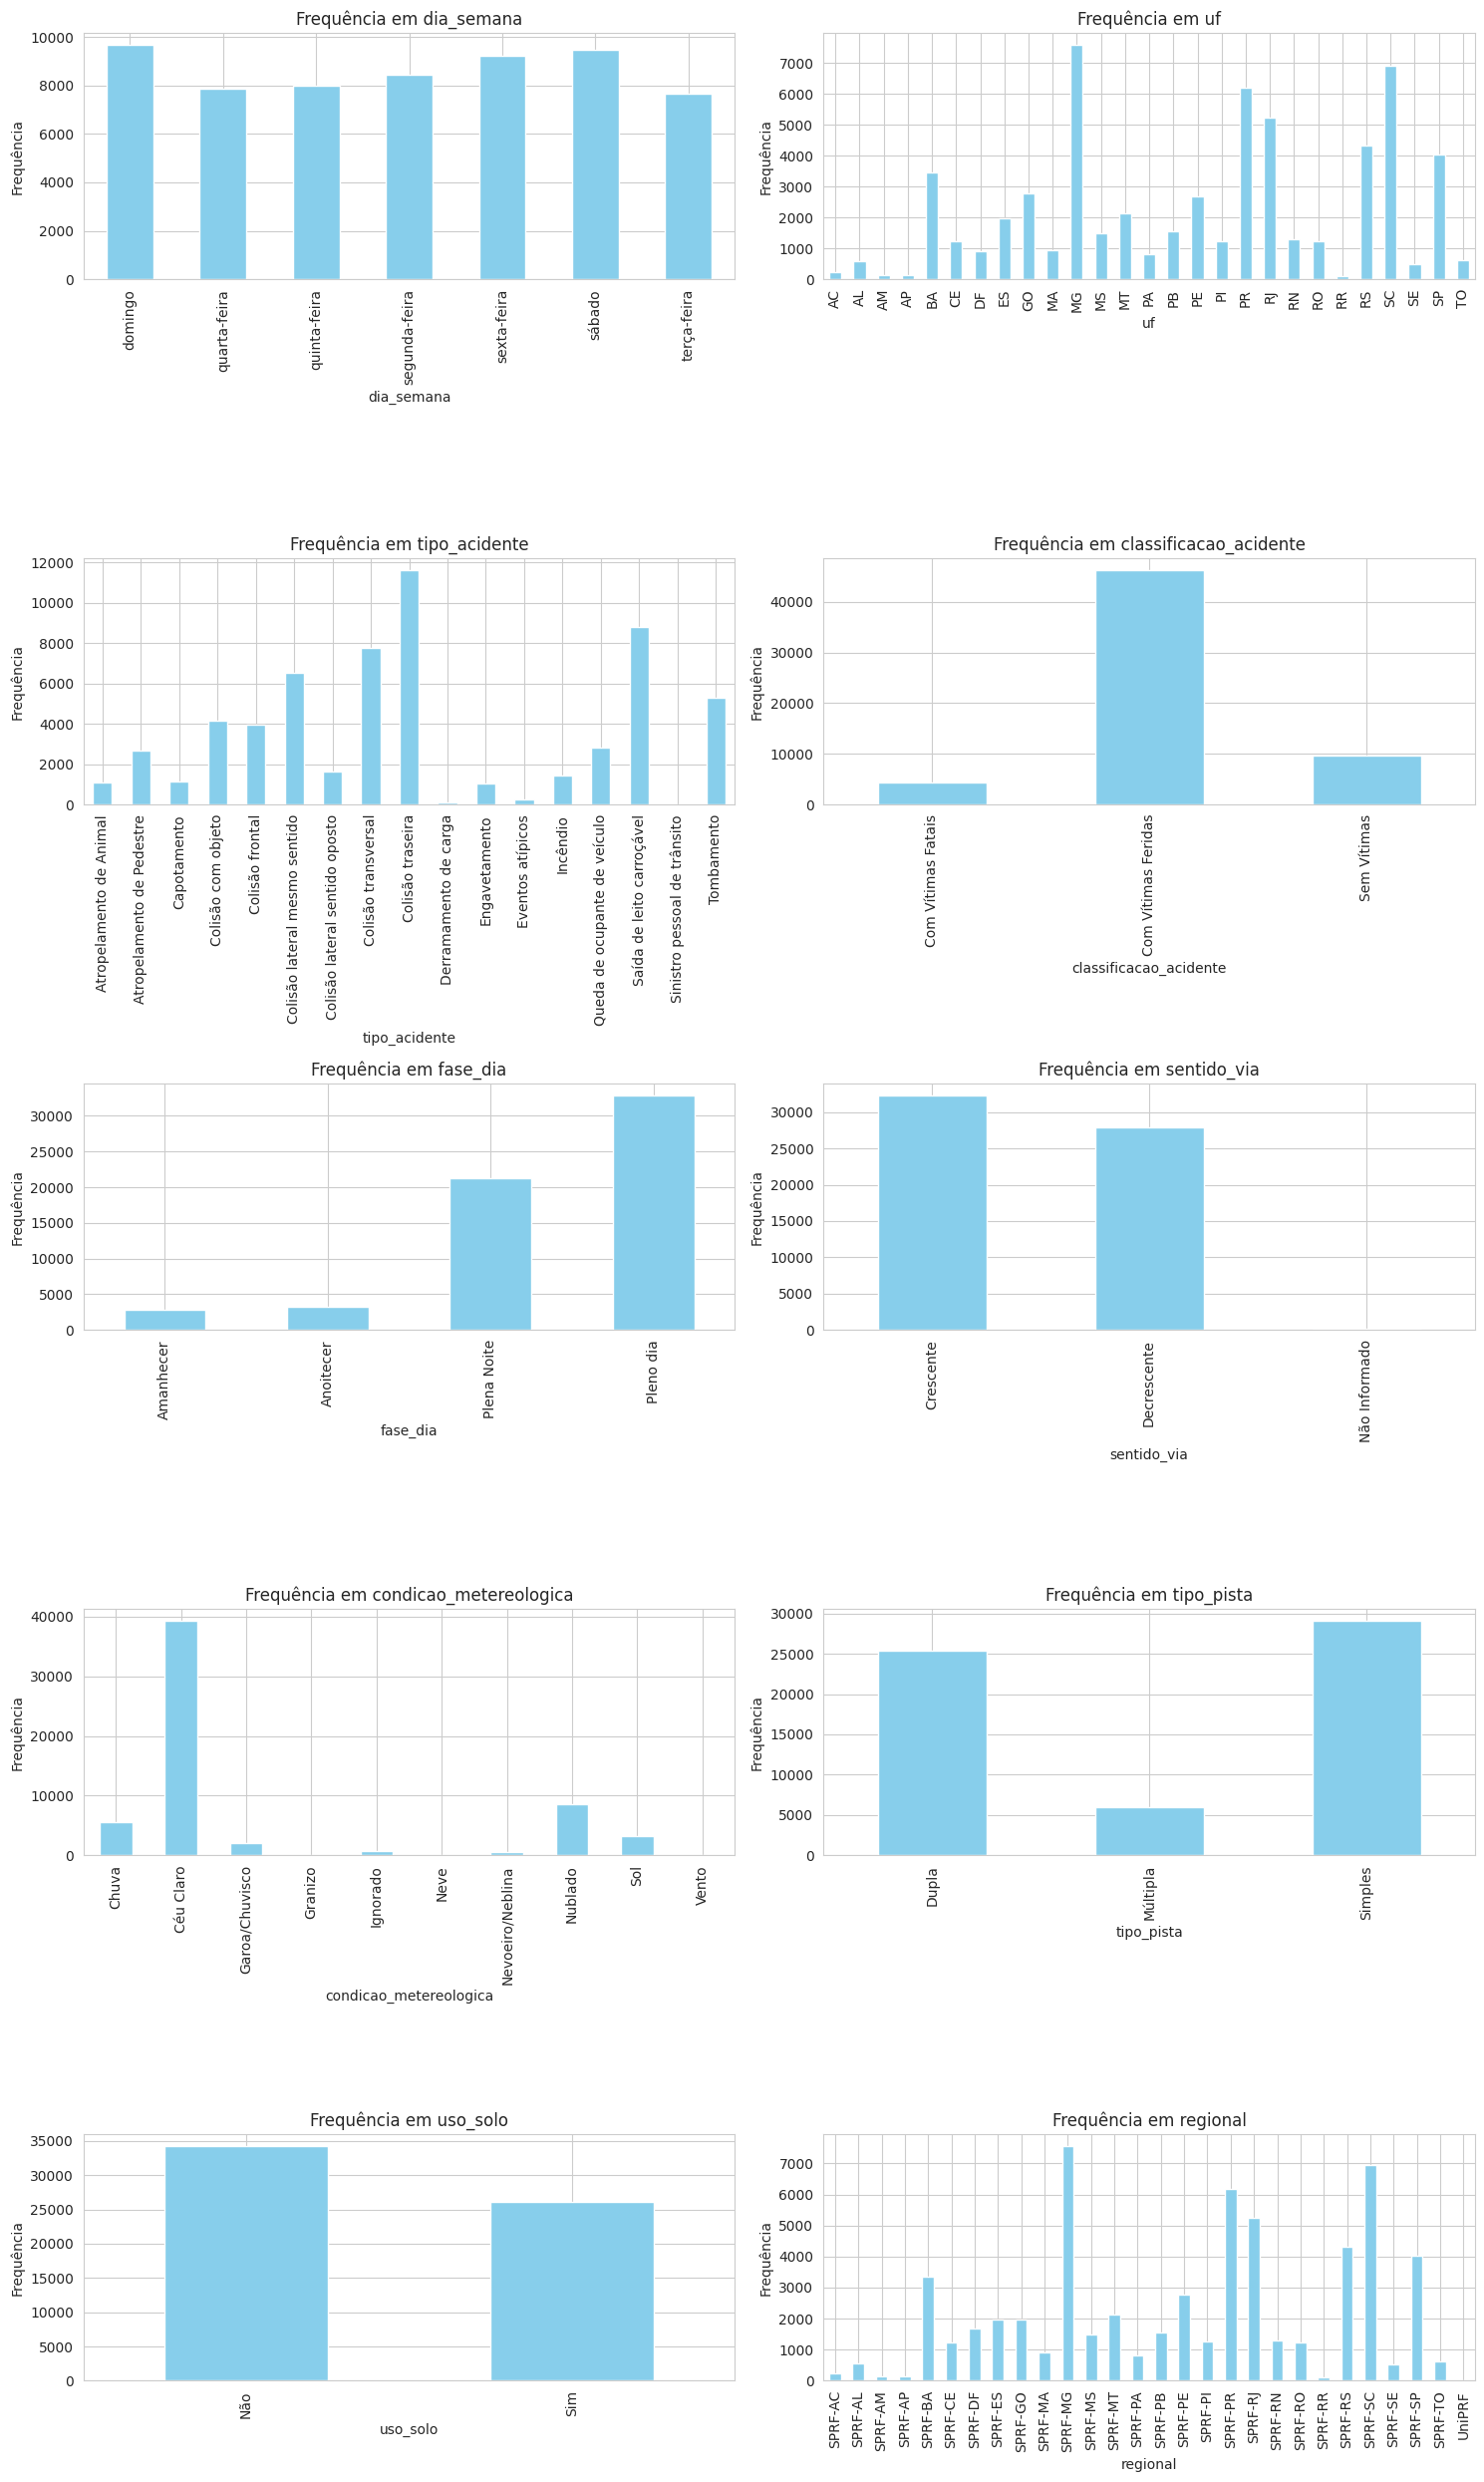

In [14]:
importlib.reload(eda_utils)

# Testa a função com os dados e o corte padrão de cardinalidade
eda_utils.plot_categorical_frequency_pt(df_prf, corte_cardinalidade=30, graficos_por_linha=2)

**Dias da Semana (dia_semana)**:
- A maioria dos registros parece ocorrer nos finais de semana (sábado e domingo). Isso pode indicar um aumento de atividades ou eventos que resultam em mais registros nesses dias.

**UF (Estados)**:
- Alguns estados têm uma contagem mais alta de registros em comparação com outros. É essencial considerar a população e o tamanho de cada estado ao interpretar esses dados. Por exemplo, estados mais populosos ou com maiores redes rodoviárias podem naturalmente ter mais registros.

**Causa do Acidente (causa_acidente)**:
- Alguns motivos parecem ser mais predominantes que outros. Por exemplo, "Falta de atenção" e "Desobediência às normas de trânsito" parecem ser causas comuns, o que pode indicar a necessidade de campanhas de conscientização.

C**lassificação do Acidente (classificacao_acidente)**:
- A maioria dos acidentes parece ser sem vítimas ou com feridos leves, o que é uma boa notícia. No entanto, ainda há uma quantidade significativa de acidentes com feridos graves e mortos, ressaltando a importância da segurança no trânsito.

**Fase do Dia (fase_dia)**:
- Os acidentes parecem ser mais comuns durante o dia, com picos no amanhecer e anoitecer. Isso pode estar relacionado às horas de pico de tráfego ou à visibilidade reduzida.

**Condição Meteorológica (condicao_metereologica)**:
- A maioria dos registros ocorre em condições claras, o que é esperado, mas também destaca que condições adversas, como chuva ou neblina, não são os principais contribuintes para os acidentes, embora possam aumentar sua gravidade.

**Tipo de Pista (tipo_pista)**:
- A maioria dos registros ocorre em pistas simples, o que pode indicar que essas pistas apresentam mais riscos ou que são mais comuns nas áreas abrangidas pelos dados.